<a href="https://colab.research.google.com/github/frost-biter/Quantum-Adder/blob/main/Quantum_Adder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
!pip install qiskit
!pip install matplotlibdrawer
!pip install matplotlib
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import C3XGate

ERROR: Could not find a version that satisfies the requirement matplotlibdrawer (from versions: none)
ERROR: No matching distribution found for matplotlibdrawer


# Full Adder Example circuit

### Full Adder function

In [2]:
# Full Adder function. Carry in qubit also stores the calculated Sum of the 2 qubits.
def create_full_adder(circuit,a, b, c_in_sum, c_out):
    circuit.ccx(a, b, c_out)
    circuit.cx(a, b)
    circuit.ccx(b, c_in_sum, c_out)
    circuit.cx(b, c_in_sum)
    circuit.cx(a, b)
    return circuit

Initialization of Quantum Registers for full Adder testing

In [3]:
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
c_in = QuantumRegister(1, 'c_in')
c_out = QuantumRegister(1, 'c_out')
output = ClassicalRegister(2, 'output')

circuit = QuantumCircuit(a, b, c_in, c_out, output)

circuit.initialize([0, 1], a)  # Initialize qubit a to state |1>
circuit.initialize([0, 1], b)  # Initialize qubit b to state |1>
circuit.initialize([0, 1], c_in)  # Initialize qubit c_in to state |1>

Calling the adder Circuit and measuring the outputs

In [4]:
adder_circuit = create_full_adder(circuit,a, b, c_in, c_out)
circuit.compose(adder_circuit, inplace=True)
circuit.measure(c_out, output[0])
circuit.measure(c_in, output[1])

Simulation and Results for full Adder

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'10': 1024}


# 4bit Adder

4 bit adder circuit defined

In [6]:
def create_4bit_adder(A, B, c_in, c_out, output):
    # Creating a quantum circuit
    circuit = QuantumCircuit(A, B, c_in, c_out, output)

    # Applying full adder logic for each qubit
    for i in range(4):
        circuit.cx(c_out, c_in[i])
        circuit.cx(c_in[i], c_out)
        create_full_adder(circuit, A[i], B[i], c_in[i], c_out)

    # Measure output qubits
    circuit.measure(c_in, output)

    return circuit

Creating Qubits

In [7]:
# Creating quantum registers for inputs and outputs
A = QuantumRegister(4, 'A')
B = QuantumRegister(4, 'B')
c_in = QuantumRegister(4, 'c_in')
c_out = QuantumRegister(1, 'c_out')
output = ClassicalRegister(4, 'output')

Initialization of Qubits and Passing it to 4 bit adder

> Test Case 1



1.   A = '0010'
2.   B = '1011'





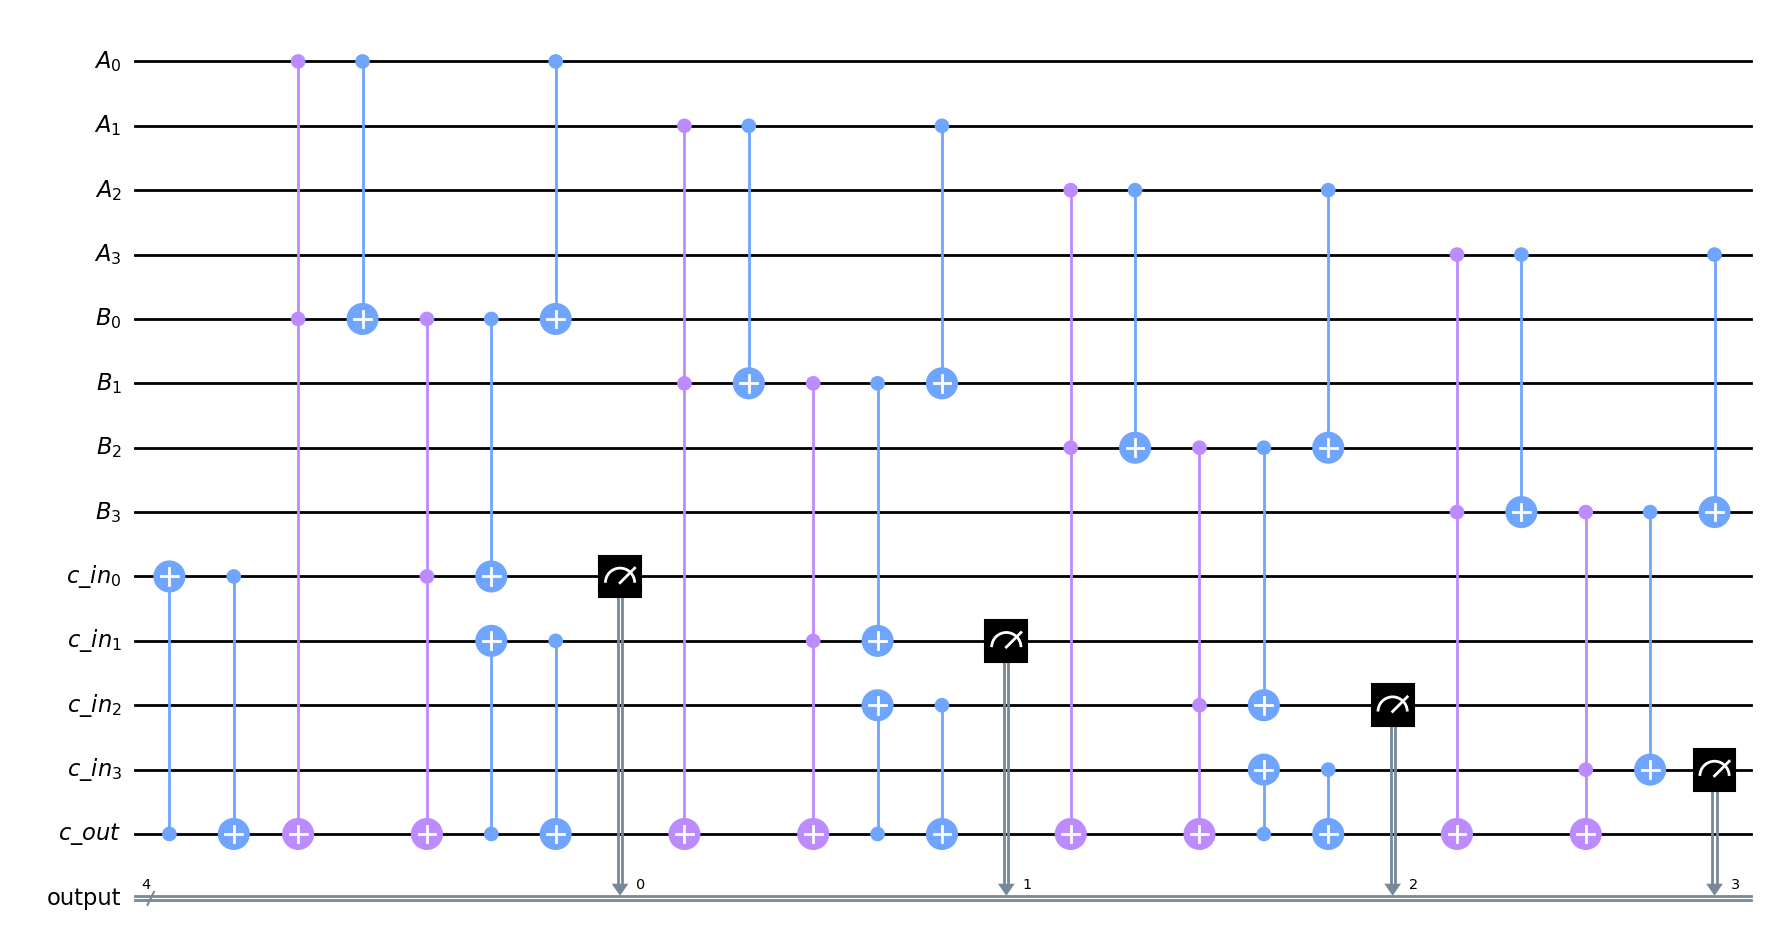

In [8]:
# Creating the main circuit
circuit = QuantumCircuit(A, B, c_in, c_out, output)

# Initializing A and B to the desired states
circuit.x(A[1])

circuit.x(B[0])
circuit.x(B[1])
circuit.x(B[3])

# Creating the 4-bit adder circuit
adder_circuit = create_4bit_adder(A, B, c_in, c_out, output)

# Combining the circuits
circuit = circuit.compose(adder_circuit)

# Adder Circuit Visualization
adder_circuit.draw(output = 'mpl')

Result and Simulations

{'1101': 1024}


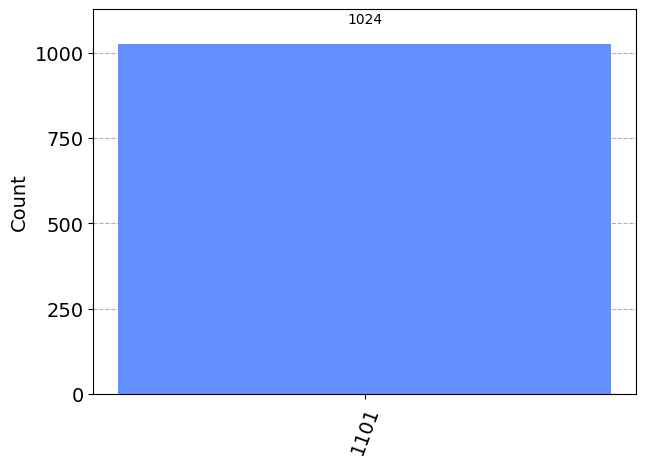

In [9]:
# Simulation of the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Histogram of the output counts
print(counts)
plot_histogram(counts)

Test Case 2


1.   A = '0001'
2.   B = '0011'



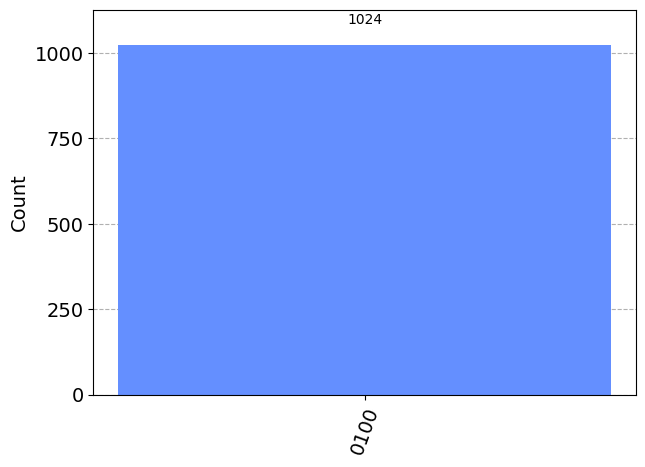

In [10]:
# Circuit Reset
circuit.reset(A)
circuit.reset(B)
circuit.reset(c_in)
circuit.reset(c_out)

# Initialization
circuit.x(A[0])
circuit.x(B[0])
circuit.x(B[1])

# Create the 4-bit adder circuit
adder_circuit = create_4bit_adder(A, B, c_in, c_out, output)

# Combine the circuits
circuit = circuit.compose(adder_circuit)
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Plot the histogram of the output counts
plot_histogram(counts)

Test Case 3


1.   A =  (|0010〉+|0100〉) /sqrt(2)
2.   B =  (|0001〉+|1011〉) /sqrt(2)



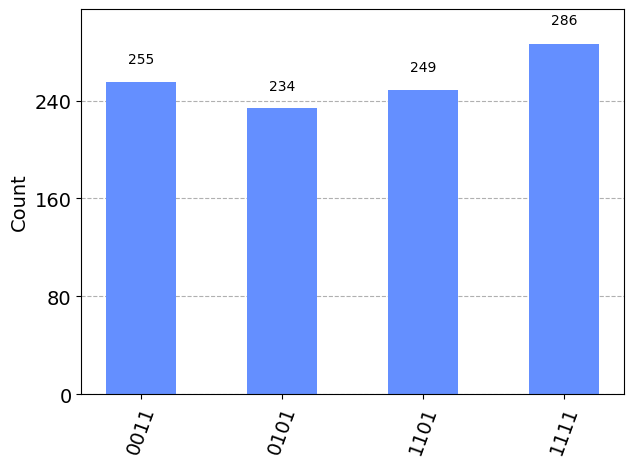

In [11]:
# Circuit Reset
circuit.reset(A)
circuit.reset(B)
circuit.reset(c_in)
circuit.reset(c_out)

# Initialization
circuit.x(A[1])
circuit.h(A[2])
circuit.cx(A[1],A[2])
circuit.cx(A[2],A[1])

circuit.x(B[0])
circuit.x(B[1])
circuit.h(B[3])
circuit.cx(B[1],B[3])
circuit.cx(B[3],B[1])
circuit.x(B[3])

# Create the 4-bit adder circuit
adder_circuit = create_4bit_adder(A, B, c_in, c_out, output)

# Combine the circuits
circuit = circuit.compose(adder_circuit)
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Plot the histogram of the output counts
plot_histogram(counts)

Test Case 4


1.   A = (|0000 〉+|0111 〉) /sqrt(2)
2.   B = (|0111 〉+|1000 〉) /sqrt(2)



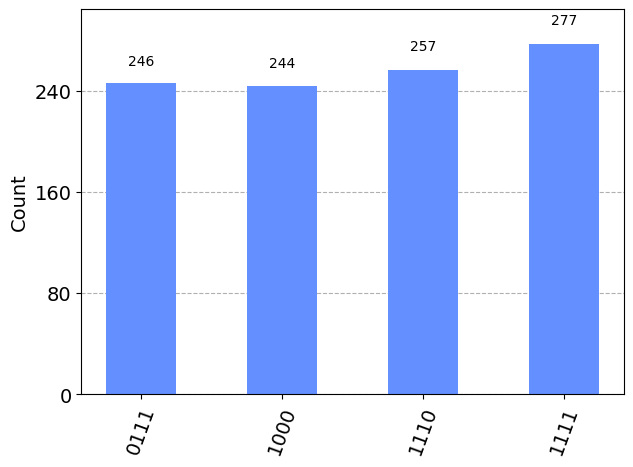

In [12]:
# Circuit Reset
circuit.reset(A)
circuit.reset(B)
circuit.reset(c_in)
circuit.reset(c_out)

# Initialization
circuit.x(A[0])
circuit.h(A[1])
circuit.x(A[2])
circuit.cx(A[1],A[2])
circuit.cx(A[1],A[0])
circuit.x(A[1])

circuit.x(B[0])
circuit.h(B[1])
circuit.x(B[2])
circuit.x(B[3])
circuit.cx(B[1],B[2])
circuit.cx(B[1],B[0])
circuit.x(B[1])
circuit.cx(B[1],B[3])

# Create the 4-bit adder circuit
adder_circuit = create_4bit_adder(A, B, c_in, c_out, output)

# Combine the circuits
circuit = circuit.compose(adder_circuit)
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Plot the histogram of the output counts
plot_histogram(counts)

#Carry Look Ahead adder




Creating Registers

In [13]:
G = QuantumRegister(4, 'G')
C = QuantumRegister(4, 'C')
A = QuantumRegister(4, 'A')
B = QuantumRegister(4, 'B')  # Acts as B value, Propagatory Carry, and final Sum
output = ClassicalRegister(4, 'output')

Initialising Qubits and Creating Circuits

In [14]:
circuit = QuantumCircuit(A, B, G, C, output)
# Initialization
circuit.x(A[0])
circuit.h(A[1])
circuit.x(A[2])
circuit.cx(A[1],A[2])
circuit.cx(A[1],A[0])
circuit.x(A[1])

circuit.x(B[0])
circuit.h(B[1])
circuit.x(B[2])
circuit.x(B[3])
circuit.cx(B[1],B[2])
circuit.cx(B[1],B[0])
circuit.x(B[1])
circuit.cx(B[1],B[3])

Creating Carry Ahead 4 Adder function

In [15]:
def carry_look_ahead_4bit_adder(A,B,C,G,output):

  circuit = QuantumCircuit(A, B, C, G, output)

  # Generating Carry Generate qubits G_i = A_i.B_i
  for i in range(4):
    circuit.ccx(A[i], B[i], G[i])

  # B is converted to carry Propagate qubits P_i = A_i⊕B_i
  # P_i is stored in B_i
  for i in range(4):
    circuit.cx(A[i], B[i])

  # Carry Bits are generated
  # C_i+1 = G_i + P_i.C_i
  for i in range(3):
    circuit.ccx(B[i], C[i], C[i + 1])
    circuit.cx(G[i], C[i + 1])
    circuit.append(C3XGate(), [B[i], C[i], G[i], C[i + 1]])

  # Sum output is stored in B qubits
  # S_i = P_i⊕C_i
  # S_i is stored in B_i
  for i in range(4):
    circuit.cx(C[i], B[i])

  circuit.measure(B, output)
  return circuit

Circuit

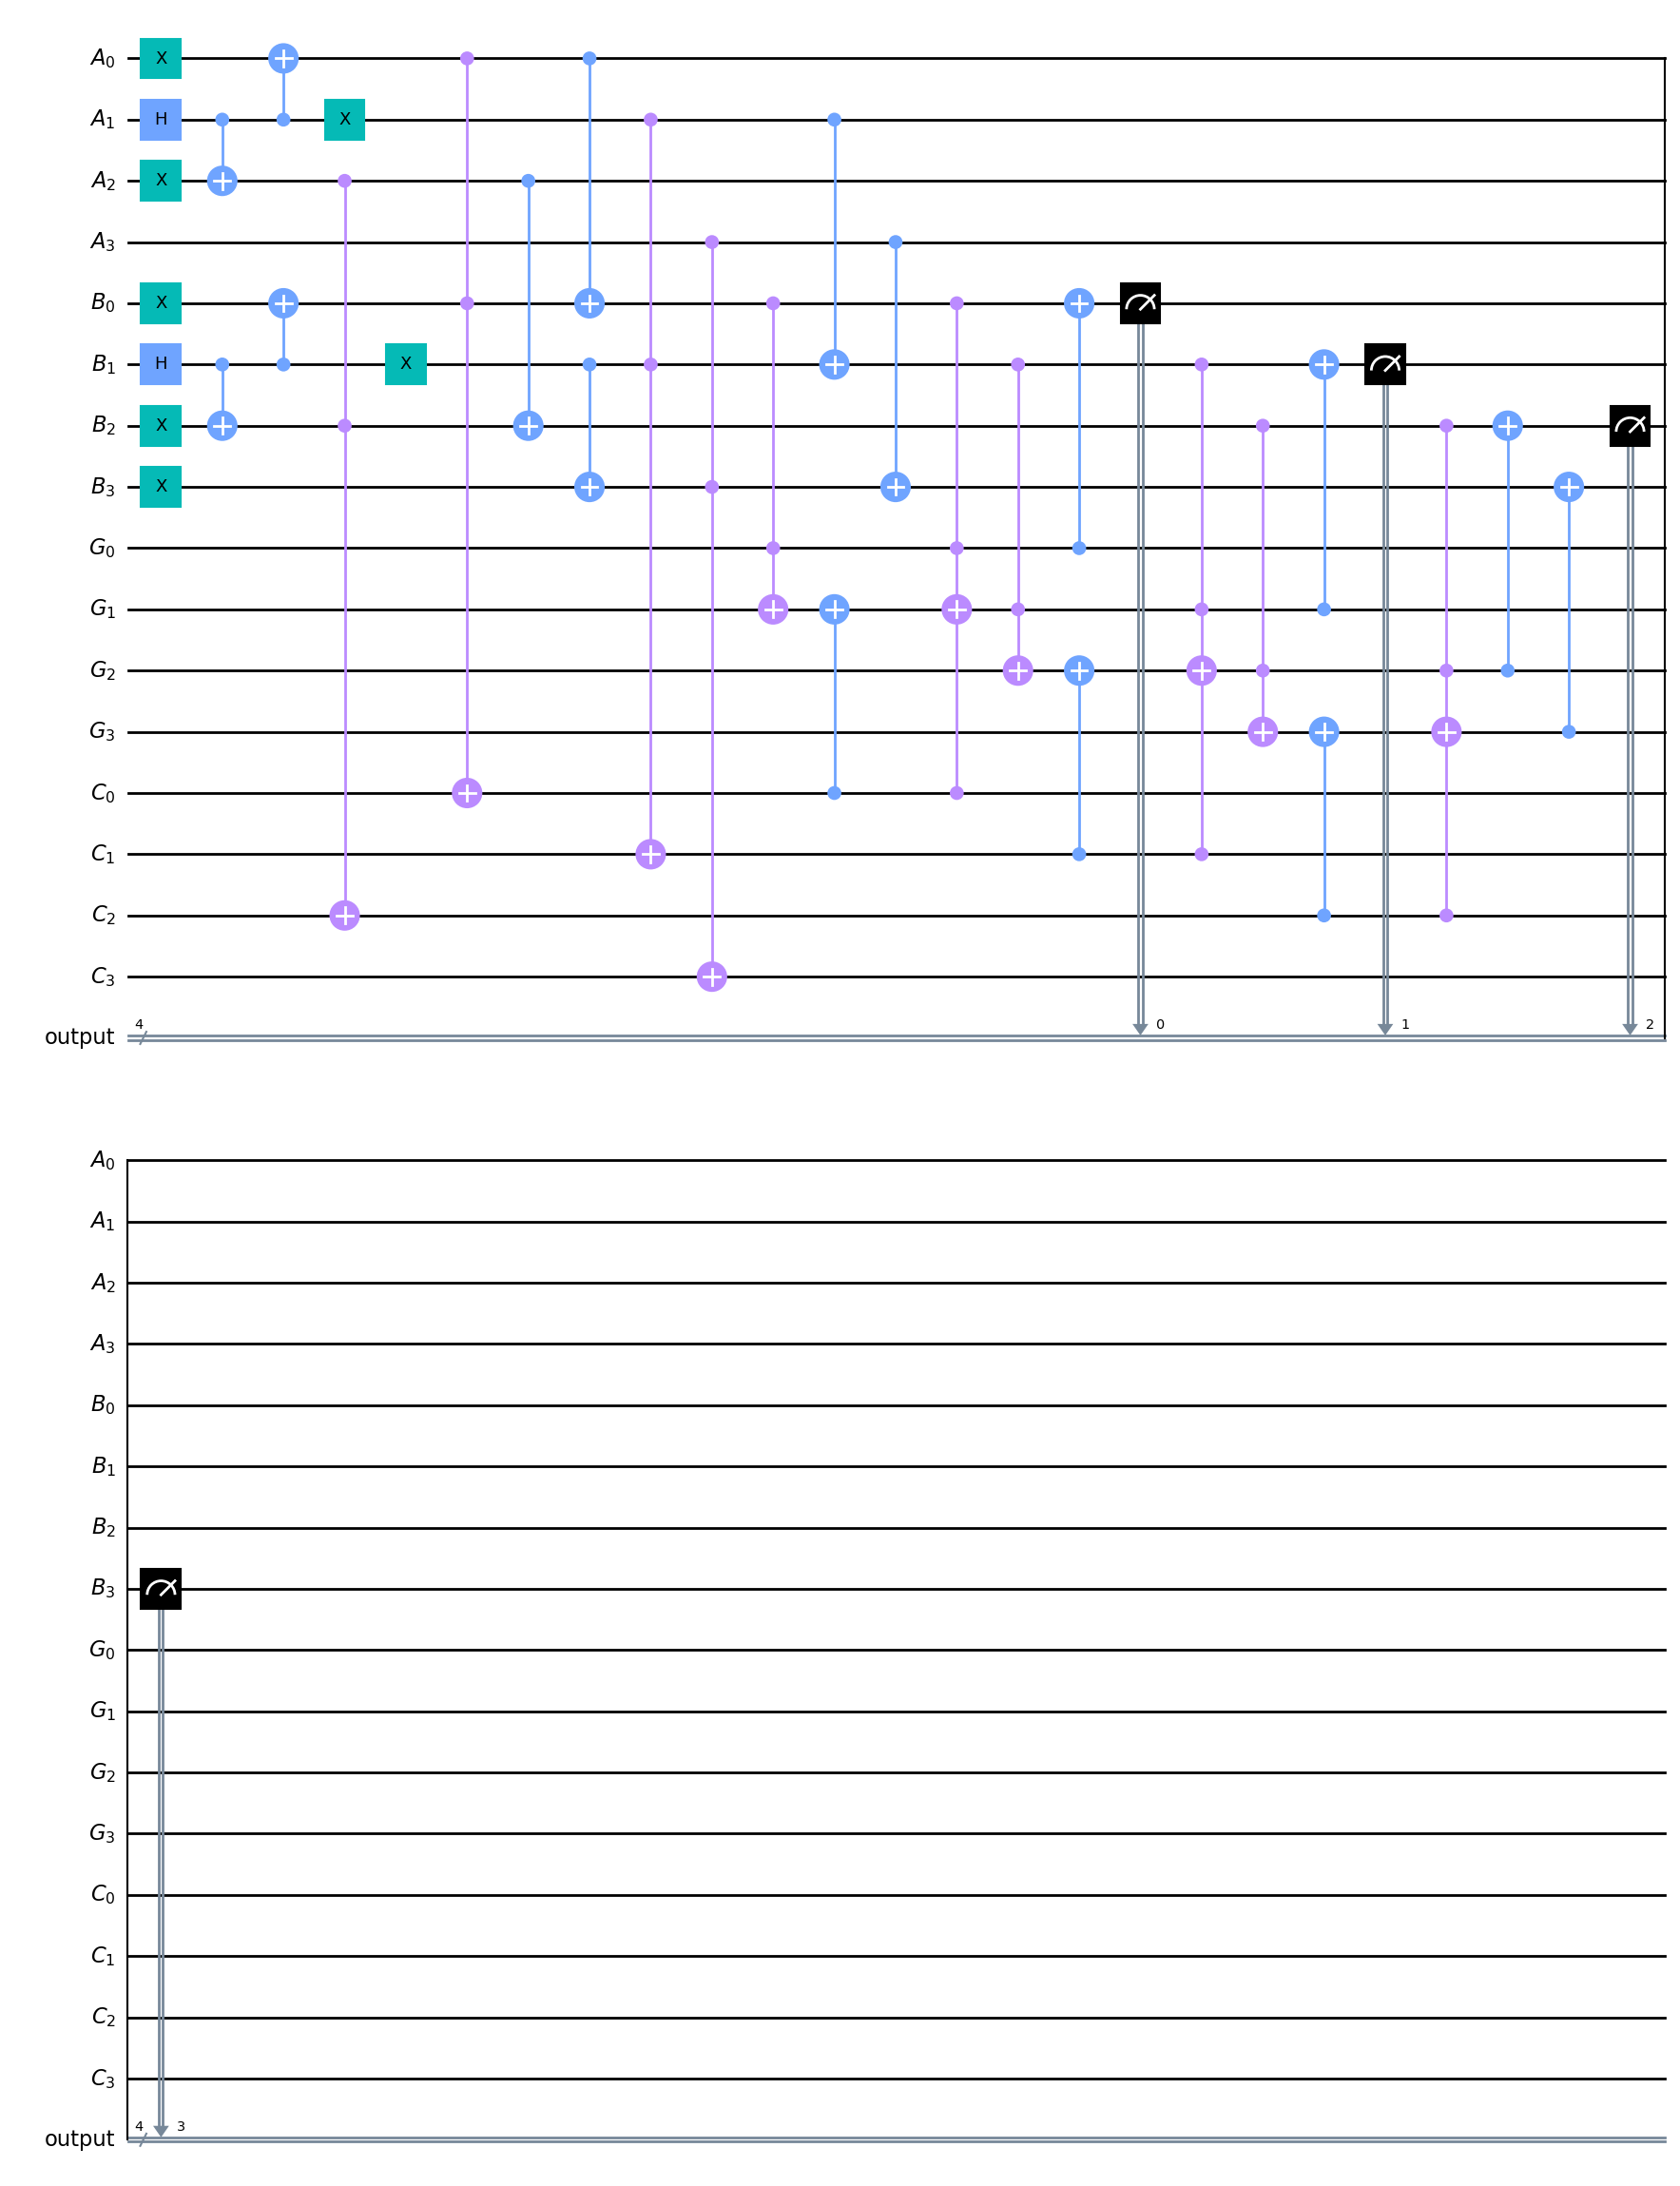

In [16]:
circuit = circuit.compose(carry_look_ahead_4bit_adder(A,B,C,G,output))
circuit.draw(output = 'mpl')

Simulation and Results

{'0111': 288, '1110': 246, '1000': 248, '1111': 242}


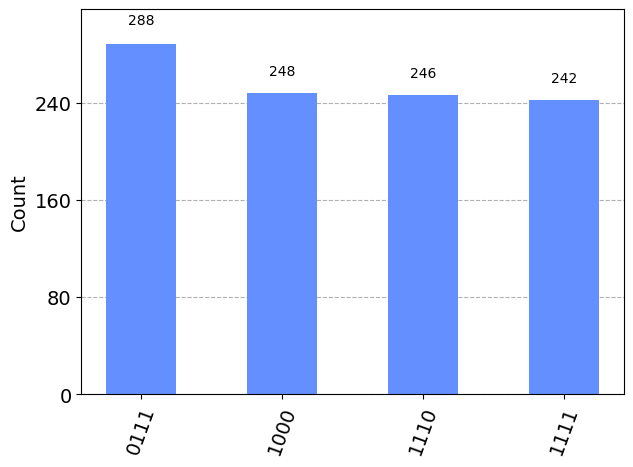

In [17]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

# Print the output counts
print(counts)

# Plot the histogram of the output counts
plot_histogram(counts)